In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import tqdm as tqdm
import matplotlib.pyplot as plt
import random

In [2]:
DATA_PATH = '/home/capstone22/WildFIrePrediction/Isaac_data'

In [3]:
# Load in all csvs
dataframes = {}
file_names = os.listdir(DATA_PATH)
for f in file_names:
    # skip TD files in this for first cases of graphs
    if f[:2] == 'TD':
        continue
    name = f[:f.rfind('.')].split('_')[-1] # Extract the name of the file by splitting the file name by '.' and '_'
    path = os.path.join(DATA_PATH, f)
    if name == 'legend': 
        legend = pd.read_csv(path) # read data_legend into a separate variable
    else:
        dataframes[name] = pd.read_csv(path) # read the file as a csv and store it in the dictionary 'dataframes' using the extracted name as the key.

In [4]:
## Take subset of columns

col_subset = ['pixel_id',
 'Road_Dist',
 'Elec_Dist',
 'Cultivated_Prop',
 'aet__maximum_Normal',
 'aet__mean_Normal',
 'aet__minimum_Normal',
 'cwd__maximum_Normal',
 'cwd__mean_Normal',
 'cwd__minimum_Normal',
 'pck__maximum_Normal',
 'pck__mean_Normal',
 'aet__mean_ThreeYear_Dev',
 'cwd__mean_ThreeYear_Dev',
 'pck__minimum_Normal',
 'Mean_Housing_Dens_25km',
 'FFWI']

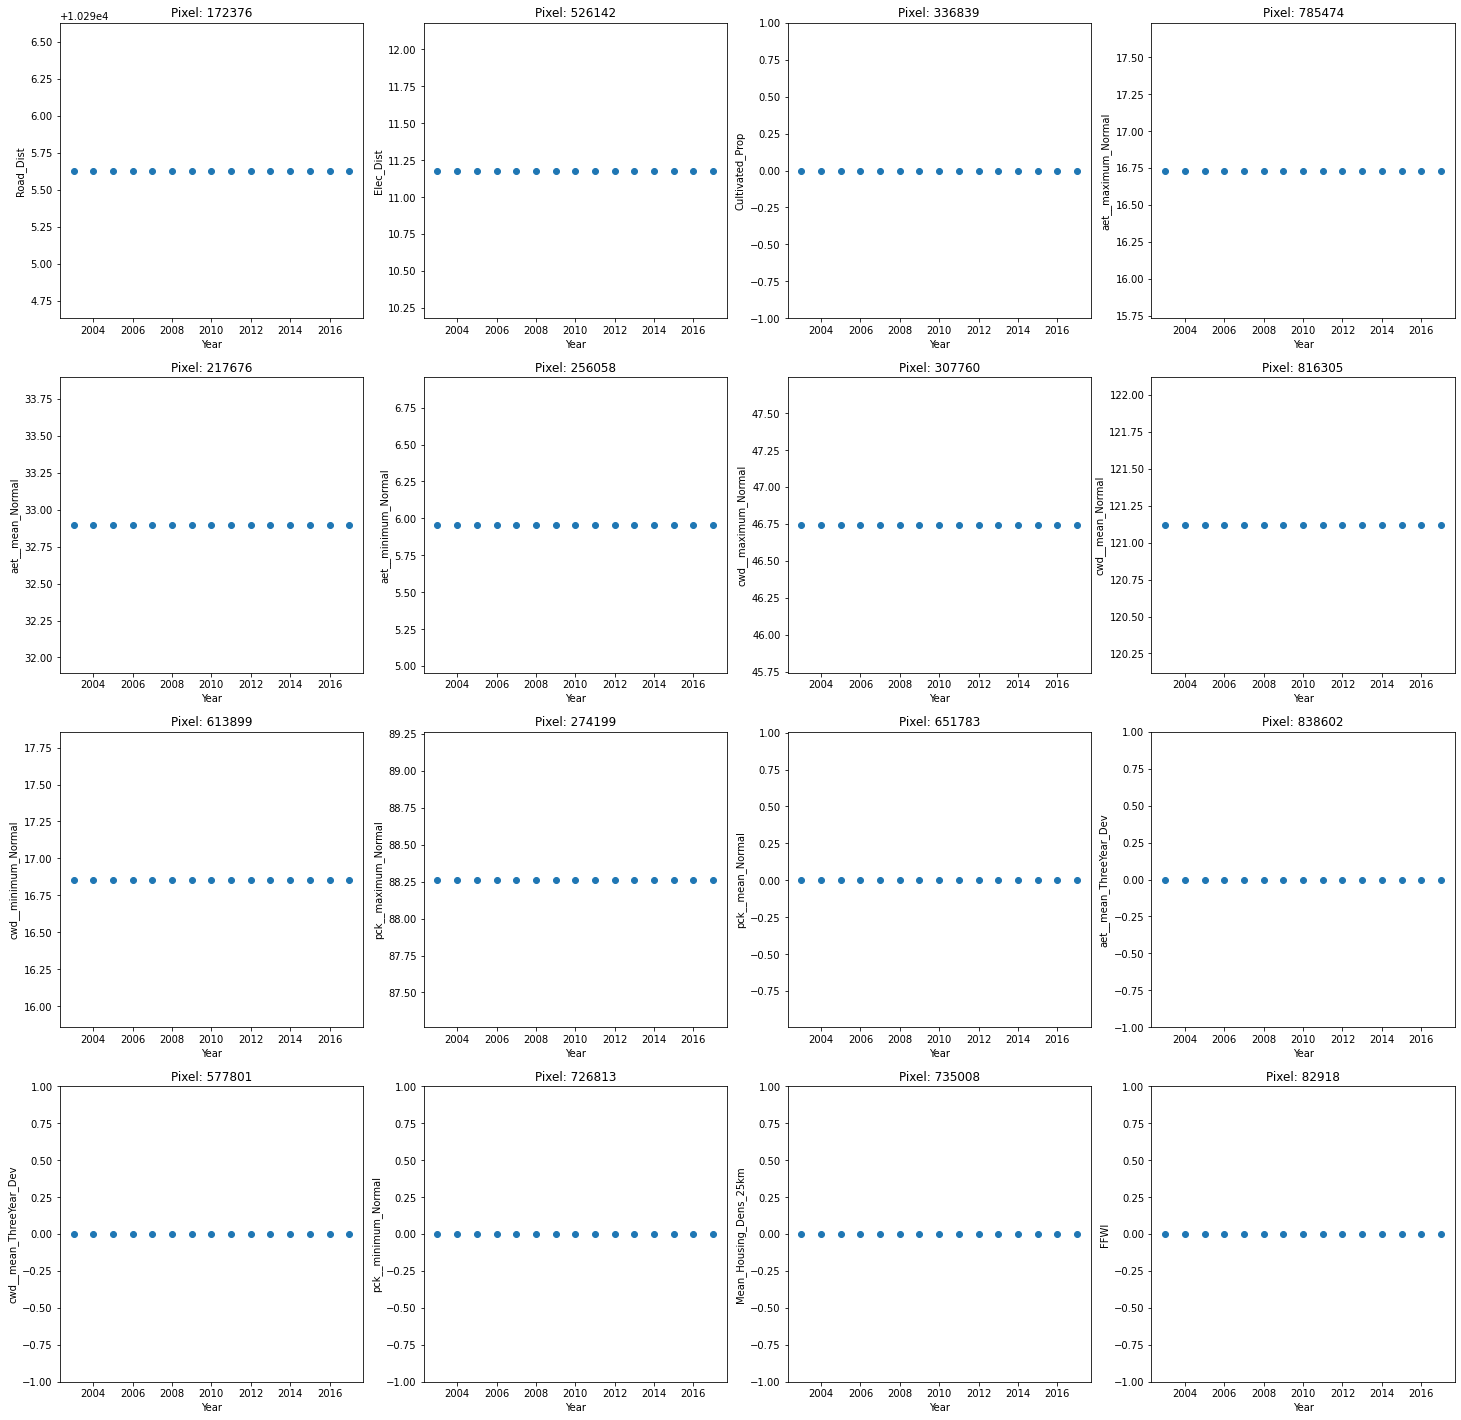

In [5]:
i = 1
plt.figure(figsize=(25, 25))

# for each feature we're interested in, we check a pixel
for col in col_subset:
    if col == 'pixel_id':
        continue
    
    # get random pixel id
    pixel = random.randint(0, 1137669)

    # while that pixel id is negative, get a new one
    while dataframes['2003']._get_value(pixel, col) < 0:
        pixel = random.randint(0, 1137669)
    values = []
    time = []
    
    # get value at that pixel
    for year in range(2003, 2018):
        name = str(year)
        time.append(year)
        values.append(dataframes[name]._get_value(pixel, col))
    
    # plot over all the years to see how that pixel changes over time
    plt.subplot(4, 4, i)
    plt.scatter(time, values)
    plt.title("Pixel: " + str(pixel))
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.ylim(min(values) - 1, max(values) + 1)
    i += 1

plt.show()
    
    


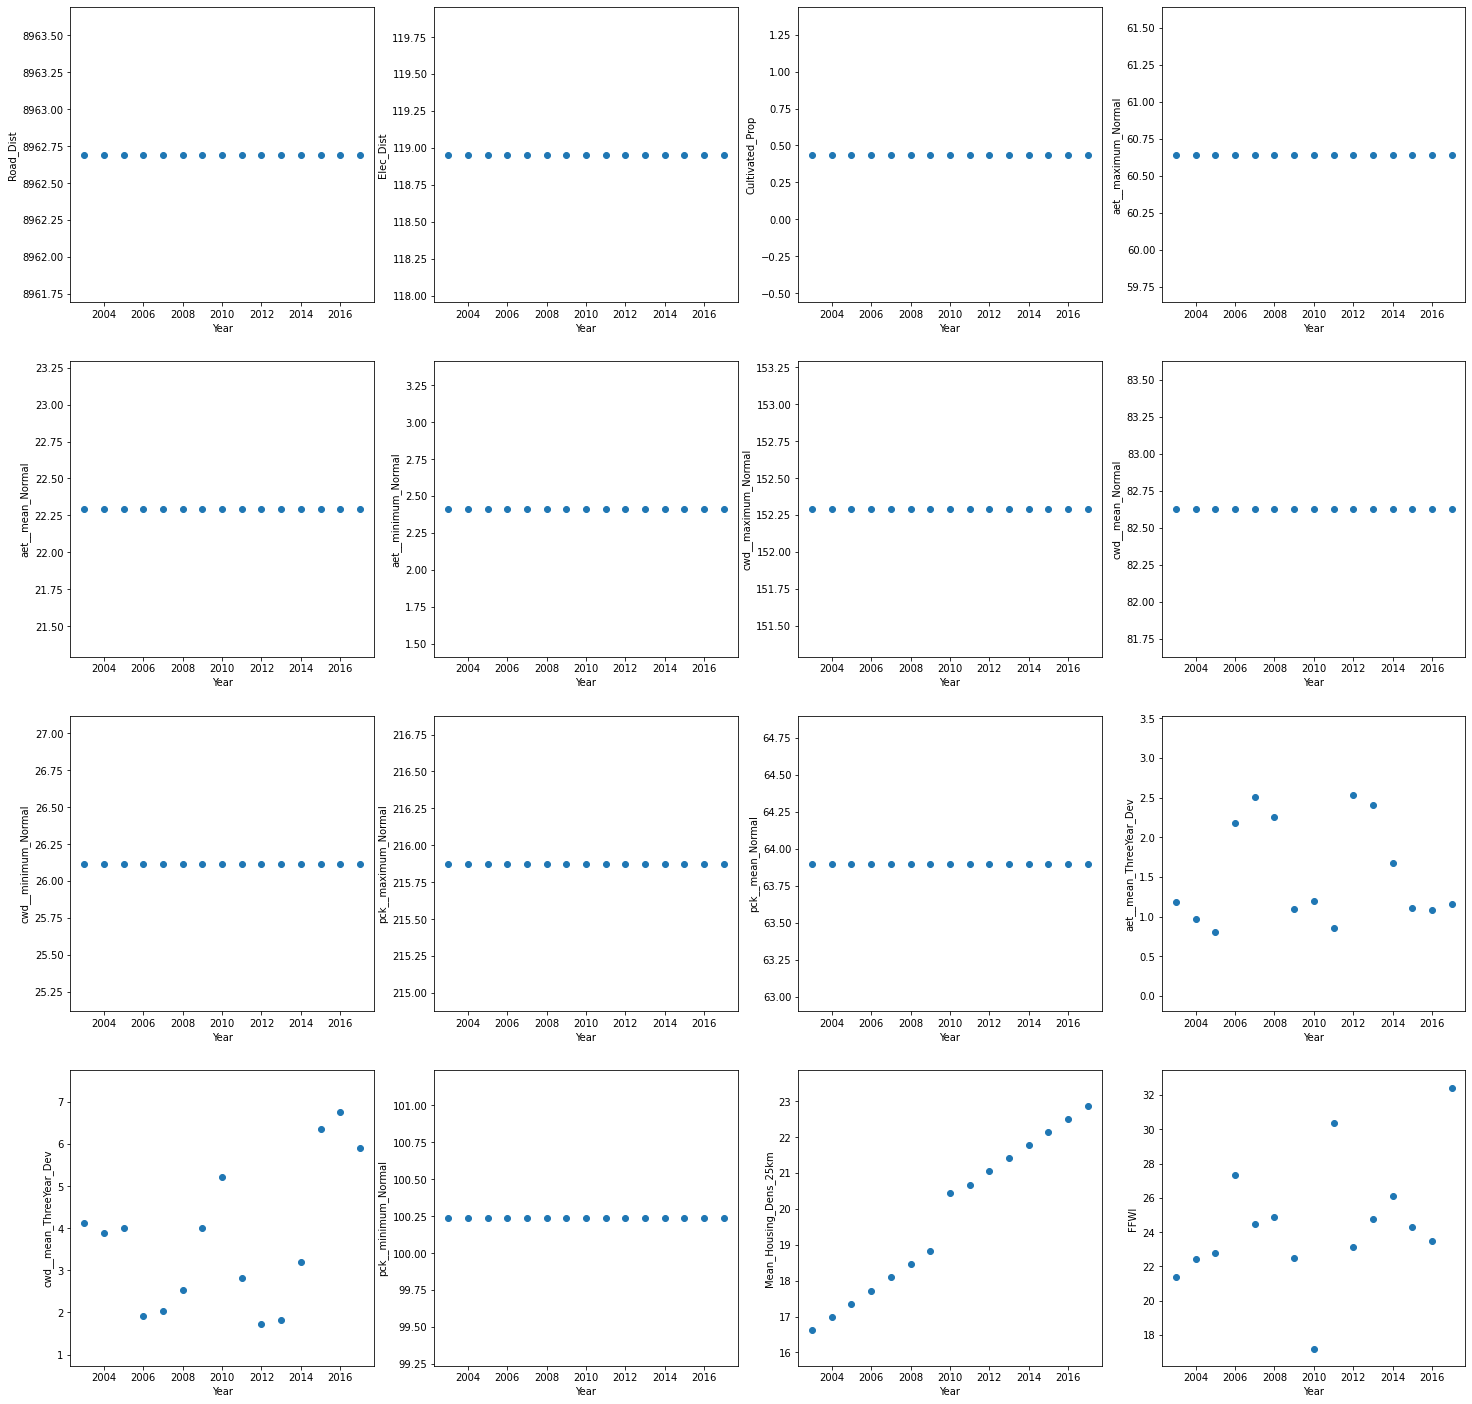

In [6]:
i = 1
plt.figure(figsize=(25, 25))
for col in col_subset:
    if col == 'pixel_id':
        continue
    
    values = []
    time = []
    for year in range(2003, 2018):
        # averages oout all values in given column > 0
        avg = dataframes[str(year)][dataframes[str(year)][col]>0][col].sum() / len(dataframes[str(year)][dataframes[str(year)][col] > 0])
        time.append(year)
        values.append(avg)
    
    # plt avg values
    plt.subplot(4, 4, i)
    plt.scatter(time, values)
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.ylim(min(values) - 1, max(values) + 1)
    i += 1

plt.show()
    
    


Plotting 2003
Plotting 2004
Plotting 2005
Plotting 2006
Plotting 2007
Plotting 2008
Plotting 2009
Plotting 2010
Plotting 2011
Plotting 2012
Plotting 2013
Plotting 2014
Plotting 2015
Plotting 2016
Plotting 2017
Done with FFWI


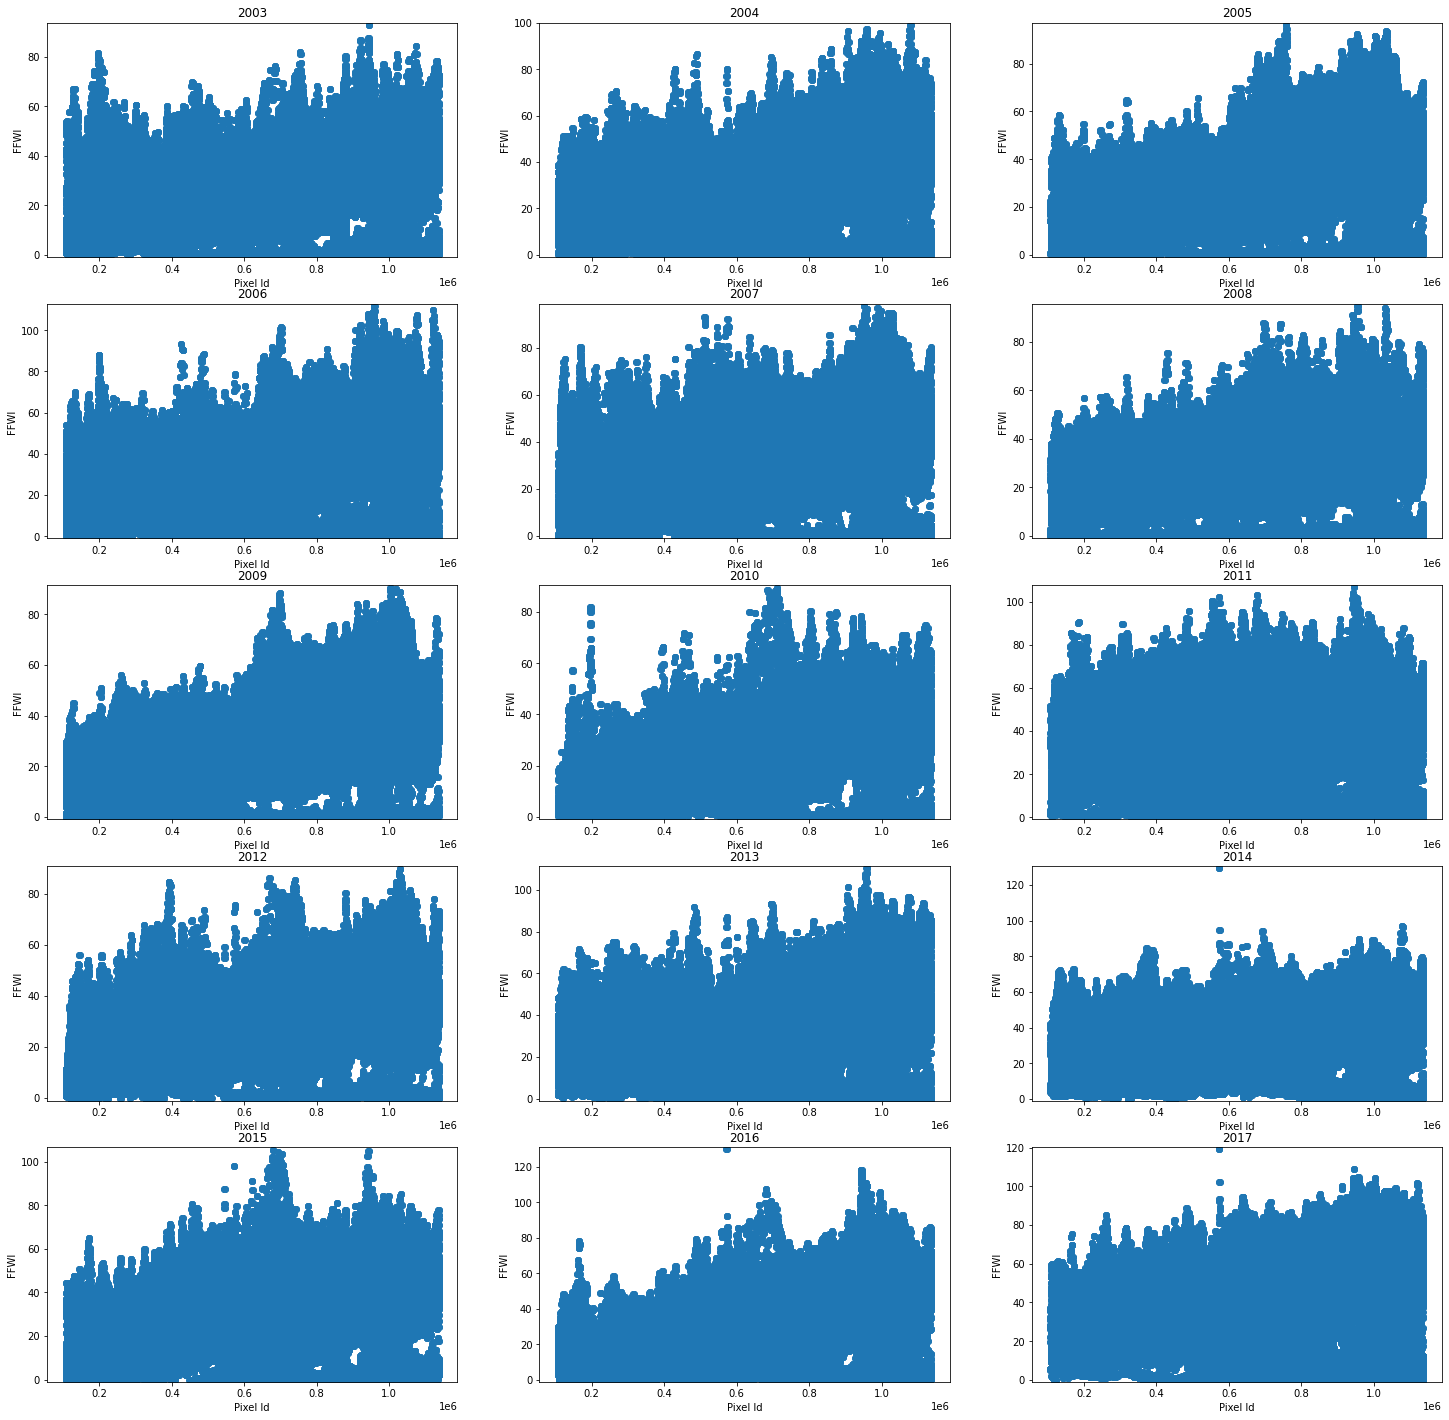

In [21]:
i = 1
plt.figure(figsize=(25, 25))
col_subset2 = [
#  'Road_Dist',
#  'Elec_Dist',
#  'Cultivated_Prop',
#  'aet__maximum_Normal',
#  'aet__mean_Normal',
#  'aet__minimum_Normal',
#  'cwd__maximum_Normal',
#  'cwd__mean_Normal',
#  'cwd__minimum_Normal',
#  'pck__maximum_Normal',
#  'pck__mean_Normal',
#  'aet__mean_ThreeYear_Dev',
#  'cwd__mean_ThreeYear_Dev',
#  'pck__minimum_Normal',
#  'Mean_Housing_Dens_25km',
 'FFWI'
]
for col in col_subset2:
    if col == 'pixel_id':
        continue
    
    for year in range(2003, 2018):
        values = []
        pixels = []
        j = 0
        
        name = str(year)
        
        for data in dataframes[name][col].values:
            j += 1
            if data > 0:
                values.append(data)
                pixels.append(j)
        
        print("Plotting " + name)

        plt.subplot(5, 3, i)
        plt.scatter(pixels, values)
        plt.title(name)
        plt.xlabel("Pixel Id")
        plt.ylabel(col)
        plt.ylim(min(values) - 1, max(values) + 1)
        i += 1
    print("Done with " + str(col))
    

plt.show()